In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# Loading the dataset
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Exploratory Data Analysis

In [108]:
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [66]:
dataset.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


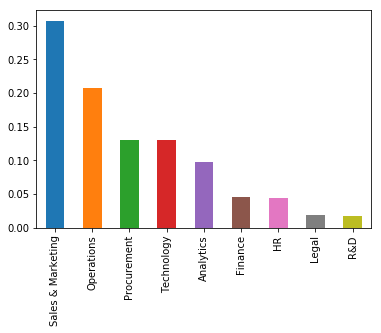

In [67]:
dataset['department'].value_counts(normalize = True).plot(kind='bar')

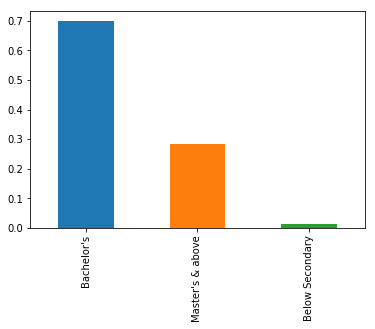

In [68]:
dataset['education'].value_counts(normalize = True).plot(kind='bar')

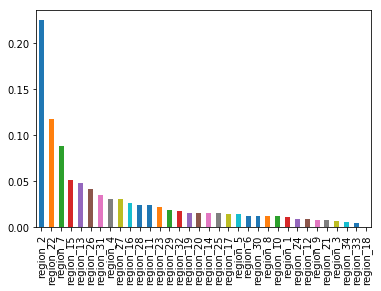

In [69]:
dataset['region'].value_counts(normalize = True).plot(kind='bar')

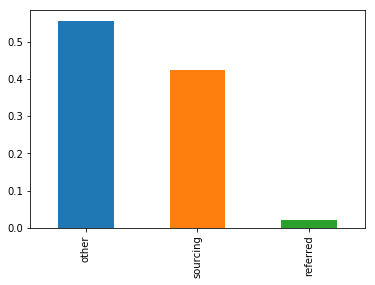

In [70]:
dataset['recruitment_channel'].value_counts(normalize = True).plot(kind='bar')

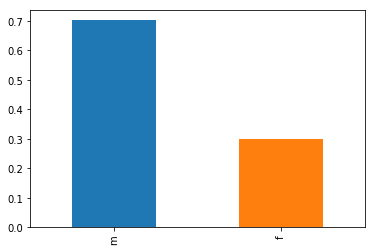

In [71]:
dataset['gender'].value_counts(normalize = True).plot(kind='bar')

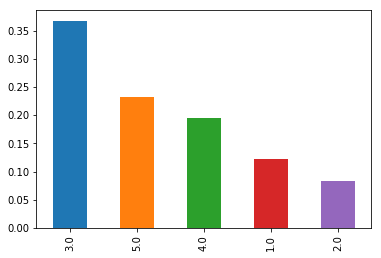

In [72]:
dataset['previous_year_rating'].value_counts(normalize = True).plot(kind='bar')

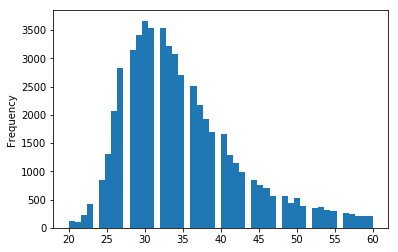

In [73]:
dataset['age'].plot(kind = "hist",bins = 50)

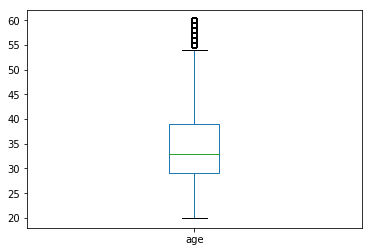

In [74]:
dataset['age'].plot(kind = "box")

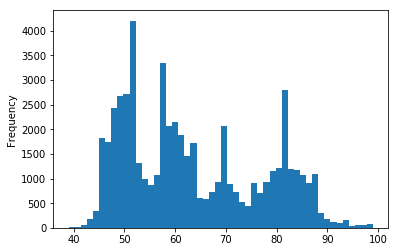

In [75]:
dataset['avg_training_score'].plot(kind = "hist",bins = 50)

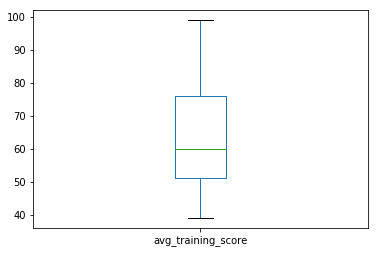

In [76]:
dataset['avg_training_score'].plot(kind = "box")

# Pre Processing

In [77]:
dataset.drop(['employee_id'],axis=1,inplace=True )

# Imputing missing values
dataset['education'].fillna(dataset['education'].mode()[0],inplace = True)
dataset['previous_year_rating'].fillna(dataset['previous_year_rating'].median(),inplace = True)

# One hot encoding categorical variables
dummy_vars = pd.get_dummies(dataset['department'],drop_first=True)
dataset.drop(['department'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

dummy_vars = pd.get_dummies(dataset['region'],drop_first=True)
dataset.drop(['region'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

dummy_vars = pd.get_dummies(dataset['education'],drop_first=True)
dataset.drop(['education'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

dummy_vars = pd.get_dummies(dataset['gender'],drop_first=True)
dataset.drop(['gender'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

dummy_vars = pd.get_dummies(dataset['recruitment_channel'],drop_first=True)
dataset.drop(['recruitment_channel'],axis=1,inplace=True )
dataset = pd.concat([dummy_vars,dataset],axis=1)

# Outlier Treatment
dataset['age'] = np.log(dataset['age'])

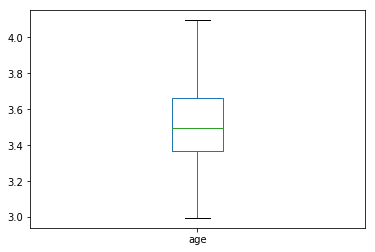

In [78]:
dataset['age'].plot(kind = "box")

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 54 columns):
referred                54808 non-null uint8
sourcing                54808 non-null uint8
m                       54808 non-null uint8
Below Secondary         54808 non-null uint8
Master's & above        54808 non-null uint8
region_10               54808 non-null uint8
region_11               54808 non-null uint8
region_12               54808 non-null uint8
region_13               54808 non-null uint8
region_14               54808 non-null uint8
region_15               54808 non-null uint8
region_16               54808 non-null uint8
region_17               54808 non-null uint8
region_18               54808 non-null uint8
region_19               54808 non-null uint8
region_2                54808 non-null uint8
region_20               54808 non-null uint8
region_21               54808 non-null uint8
region_22               54808 non-null uint8
region_23               54808 non-nu

In [80]:
X = dataset.drop(['is_promoted'],axis = 1)
y = dataset['is_promoted']

In [81]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

dataset_train = pd.concat([x_train,pd.DataFrame(y_train)], axis = 1)
dataset_test = pd.concat([x_test,pd.DataFrame(y_test)], axis = 1)
dataset_train.shape

(43846, 54)

In [82]:
y_train.value_counts(normalize = True)
# this shows that the output class is highly unbalanced

0    0.914542
1    0.085458
Name: is_promoted, dtype: float64

# Model Selection And Trainng

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn.metrics import confusion_matrix,f1_score
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y_test, y_pred))

[[10007    34]
 [  708   213]]

Accuracy: 0.9323116219667944
F1-score: 0.3647260273972603


In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
from sklearn.metrics import confusion_matrix, f1_score
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y_test, y_pred))

[[9961   80]
 [ 678  243]]

Accuracy: 0.9308520343003102
F1-score: 0.39067524115755636


In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix, f1_score
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y_test, y_pred))

[[9483  558]
 [ 492  429]]

Accuracy: 0.9042145593869731
F1-score: 0.449685534591195


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix, f1_score
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y_test, y_pred))

[[10028    13]
 [  664   257]]

Accuracy: 0.9382411968618866
F1-score: 0.43157010915197314


In [91]:
# SVM and KNN are not used as they would take a large amount of time for training nd testing.
# The Ensemble models have almost same results so any one can be used as model for future modelling.
# Random Forest is being used for futher modelling.

In [92]:
# Standard Scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/tushar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [93]:
# Appyling pca to capture all the variance
from sklearn.decomposition import PCA
pca = PCA()
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

var = pca.explained_variance_ratio_*100
cumsum =  var.cumsum()
var.sum()

99.99999999999999

In [94]:
# Re - training the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(pca_train,y_train)
y_pred = classifier.predict(pca_test)

/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
from sklearn.metrics import confusion_matrix, f1_score
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y_test, y_pred))

[[9937  104]
 [ 587  334]]

Accuracy: 0.9369640576537128
F1-score: 0.4915378955114055


In [96]:
# The f1- score of the model has drastically improved by applying pca and standard scaling the data.
# Due to the unbalanced data all the components of the pca are included or else the f1-score is less.

In [97]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 33286 to 2732
Data columns (total 54 columns):
referred                43846 non-null uint8
sourcing                43846 non-null uint8
m                       43846 non-null uint8
Below Secondary         43846 non-null uint8
Master's & above        43846 non-null uint8
region_10               43846 non-null uint8
region_11               43846 non-null uint8
region_12               43846 non-null uint8
region_13               43846 non-null uint8
region_14               43846 non-null uint8
region_15               43846 non-null uint8
region_16               43846 non-null uint8
region_17               43846 non-null uint8
region_18               43846 non-null uint8
region_19               43846 non-null uint8
region_2                43846 non-null uint8
region_20               43846 non-null uint8
region_21               43846 non-null uint8
region_22               43846 non-null uint8
region_23               43846 non

In [98]:
dataset_maj = dataset_train[dataset_train.is_promoted == 0]
dataset_min = dataset_train[dataset_train.is_promoted == 1]

print(dataset_maj.shape)
print(dataset_min.shape)

(40099, 54)
(3747, 54)


# Resampling

In [99]:
# Due to the highly unbalanced output class resampling can be done to try and improve model score.

from sklearn.utils import resample

# Upsample minority class
dataset_min = resample(dataset_min, replace=True, n_samples=20000)
 
# Downsample majority class
dataset_maj = resample(dataset_maj, replace=False, n_samples=20000)

dataset_sampled = pd.concat([dataset_maj,dataset_min])

from sklearn.utils import shuffle
dataset_sampled = shuffle(dataset_sampled)
dataset_sampled.shape

(40000, 54)

In [100]:
Xs = dataset_sampled.drop(['is_promoted'],axis = 1)
ys = dataset_sampled['is_promoted']

X = dataset_test.drop(['is_promoted'],axis = 1)
y = dataset_test['is_promoted']

from sklearn.model_selection import train_test_split
xs_train, xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.2, random_state = 92)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
xs_train = sc_X.fit_transform(xs_train)
xs_test = sc_X.transform(xs_test)
X = sc_X.transform(X)


from sklearn.decomposition import PCA
pca = PCA()
pcas_train = pca.fit_transform(xs_train)
pcas_test = pca.transform(xs_test)
X = pca.transform(X)

var = pca.explained_variance_ratio_*100
cumsum =  var.cumsum()
var.sum()


from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(pcas_train,ys_train)


ys_pred = classifier.predict(pcas_test)
from sklearn.metrics import confusion_matrix, f1_score
mats = confusion_matrix(ys_test,ys_pred)
print(mats)
print()
print("Accuracy:" ,np.trace(mats)/mats.sum())
print("F1-score:" ,f1_score(ys_test, ys_pred))

print()

y_pred = classifier.predict(X)
from sklearn.metrics import confusion_matrix, f1_score
mat = confusion_matrix(y,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y, y_pred))

/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/tushar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/home/tushar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


[[3142  879]
 [ 614 3365]]

Accuracy: 0.813375
F1-score: 0.8184360938830111

[[7877 2164]
 [ 185  736]]

Accuracy: 0.7857142857142857
F1-score: 0.3852394661083486


In [101]:
# The various options for upsampling and downsampling were tested.
# None of the smapling method seem to be further improving the f1-score.
# So for the final result XG boost is used with oa trained data.

# Parameter tuning Using GridSearchCV

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
classi = GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV
params = {"learning_rate":[0.1,0.05,0.2],
          "max_depth" : np.arange(5,9),
          "min_samples_leaf" : [1,10,20],
          "min_samples_split" : [2,10,20],
          }
cla = GridSearchCV(classi, params,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='f1')
cla.fit(pca_train, y_train)

cla.best_params_
cla.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.7min


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

classifier.fit(pca_train,y_train)
y_pred = classifier.predict(pca_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
mat = confusion_matrix(y_test,y_pred)
print(mat)
print()
print("Accuracy:" ,np.trace(mat)/mat.sum())
print("F1-score:" ,f1_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(classifier,pca_test, y_test, cv=10, scoring='accuracy')
print(res)
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
#Thank You